# Cyclistic Bike-share - A Case study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
#https://stackoverflow.com/questions/51321021/how-to-read-multiple-csv-files-in-a-directory-through-python-csv-function
import os

filenames = os.listdir(r"..\Cyclist-BikeShareAnalysis\divvy-tripdata") # lists all csv files in your directory

def extract_name_files(text): # removes .csv from the name of each file
    name_file = text.strip('.csv').lower()
    return name_file

names_of_files = list(map(extract_name_files, filenames)) # creates a list that will be used to name your dataframes

# saves each csv in a dataframe structure
dfs = {}  # create an empty dictionary to store the dataframes
for filename in filenames:
    # use the filename as the key for the dataframe in the dictionary
    dfs[filename] = pd.read_csv("../Cyclist-BikeShareAnalysis/divvy-tripdata/" + filename)
    
dfs.keys()

## Data Exploration

Let's start by taking a first look at a couple of our datasets:

In [3]:
dfs['202204-divvy-tripdata.csv'].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member
2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member


In [4]:
dfs['202304-divvy-tripdata.csv'].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


As we can see, the datasets contain the same columns. We should combine the datasets them into only one. This will make it a lot easier to clean the data, make any transformations, and perform analysis. We are going to concante only 12 dataframes to analize the data from one year (from April 2022 to March 2023, data from April 2023 will be used at the end to compare the results after one year).

In order to do this, we will use the concat() function. 

In [5]:
df = pd.concat([value for key, value in dfs.items() if key != '202304-divvy-tripdata.csv'], axis=0, ignore_index = True)

Now, we should check the data types we will be working with:

In [6]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

The next step involves learning more about some of our dataset's characteristics, so we can understand its content better.

* **How many unique rides are there in total?**

In [7]:
df.ride_id.nunique()

5803720

* **How many types of bikes are there?**

In [8]:
df.rideable_type.nunique()

3

## Cleaning Data

Now, it is time to make sure our data is clean and tidy. 

First lets clean columns names and look for duplicate values

In [9]:
df.rename(mapper=str.strip, axis='columns', inplace = True) #clean columns name removing any blank space after the name
df['ride_id'].duplicated().sum()

0

No duplicate rows found. We should also check if any columns have empty/null values.

In [10]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    839082
start_station_id      839214
end_station_name      896319
end_station_id        896460
start_lat                  0
start_lng                  0
end_lat                 5855
end_lng                 5855
member_casual              0
dtype: int64

We do have null values in our dataset. There are null values in the following columns: start_station_name, start_station_id, end_station_name, end_station_id, end_lat, and end_lng.

## Data transformation

In this next step, we will transform certain aspects of the data in order to analyze them. When using dtypes, we learned that some of our columns are of type object. We need to change the data type from columns started_at and ended_at to datetime to perform calculations.

In [11]:
df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)

Now we are going to create a column to store the ride length in min.

In [12]:
df['ride_length']=(df['ended_at']-df['started_at']).dt.total_seconds()/60

We can calculate the distance from the lat/long coordinates, however this is not a good measurement since some rides can end in the same starting station. We leave the code here for future references.

In [13]:
# def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
#     """
#     https://stackoverflow.com/questions/40452759/
    
#     Calculate the great circle distance between two points
#     on the earth (specified in decimal degrees or in radians)

#     All (lat, lon) coordinates must have numeric dtypes and be of equal length.
#     """
#     if to_radians:
#         lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

#     a = np.sin((lat2-lat1)/2.0)**2 + \
#         np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

#     return earth_radius * 2 * np.arcsin(np.sqrt(a))

# df['ride_dist']=haversine(df['start_lat'],df['start_lng'],df['end_lat'],df['end_lng'])

Before proceeding, we will check if there is an outliterer in the ride_length column. We'll check for rows with zero or negative values in ride_length and remove them. 

In [14]:
df=df[df['ride_length'] > 0]

Let's also look at the maximum travel length value

In [15]:
(df['ride_length'].max(), df['ride_length'].idxmax())

(41387.25, 4491072)

Let's investigate this journey as it is a very long journey.

In [16]:
df.loc[4491072]

ride_id                            7D4CB0DD5137CA9A
rideable_type                           docked_bike
started_at                      2022-10-01 15:04:38
ended_at                        2022-10-30 08:51:53
start_station_name    St. Louis Ave & Fullerton Ave
start_station_id                       KA1504000090
end_station_name                                NaN
end_station_id                                  NaN
start_lat                                 41.924816
start_lng                                -87.714495
end_lat                                         NaN
end_lng                                         NaN
member_casual                                casual
ride_length                                41387.25
Name: 4491072, dtype: object

We can see that this trip started on October 1 and ended on October 30, but there is no end station name record, and no record in the latitude/longitude columns. Lets find out how many trips that have a duration greater than one day have records in all their columns.

In [17]:
print(len(df[(df['ride_length'] > 1440)].ride_length), 'rides last more than one day')
print(len(df[(df['ride_length'] > 1440)].dropna().ride_length), 'rides last more than one day and have all its data complete' )

5309 rides last more than one day
103 rides last more than one day and have all its data complete


We can see that this group of the data not have problems, since only the 2% of the record have null values, so these trip lengths are not that outlier. However, during the cleaning phase we noticed that the columns corresponding to the station information had about 900,000 missing data which is about 15% of the data or more. To decide if we drop this data, we will compare the mean value of both groups (group with all the columns filled and group with empty values in any column).

In [18]:
print(df.dropna().ride_length.mean(), 'is the mean for data that is complete')
print(df[(df[['start_station_name','start_station_id','end_station_name','end_station_id','end_lat','end_lng']].isnull()).any(axis=1)].ride_length.mean(), 'is the mean for data that is incomplete')

16.643857330122874 is the mean for data that is complete
26.91940249194444 is the mean for data that is incomplete


We can see that the mean are differents. Lets be a little rigorous and do an unpaired hypothesis testing (A/B test) with a 5% treshold.

In [19]:
from scipy.stats import ttest_ind
ttest_ind(df.dropna().ride_length, df[(df[['start_station_name','start_station_id','end_station_name','end_station_id','end_lat','end_lng']].isnull()).any(axis=1)].ride_length)

Ttest_indResult(statistic=-59.77274251794522, pvalue=0.0)

So according to this result we are going to drop the data that is not complete since we have enough evidence to reject the null hypthosis of equal means.

In [20]:
df.dropna(inplace = True)

Finnally we also are going to create a hour, day of the week, month column and year column (since we are working with data from april 2022 to april 2023)

In [21]:
df['hour'] = df['started_at'].dt.hour
df['dayofweek'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()
df['year'] = df['started_at'].dt.year

In [22]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,hour,dayofweek,month,year
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member,11.800000,17,Wednesday,April,2022
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member,20.166667,19,Sunday,April,2022
2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member,6.133333,19,Wednesday,April,2022
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual,9.383333,21,Friday,April,2022
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member,5.683333,15,Saturday,April,2022


## Data Analyze

We will now take a closer look at more specific information surrounding our dataframe. Since our business task is to find out how casual riders and members are using Cyclistic bikes differently, we are going to filter the data and create some pivot tables to compare the numbers from the two types of customers.

But first we make a histogram to see the distribution of our data (Taking into account that only 5648 trips had a duration greater than 1440 minutes,1 day, and this is less than 1% of our data sets, we will make the histogram with the 1-day trip data for practical purpuse).

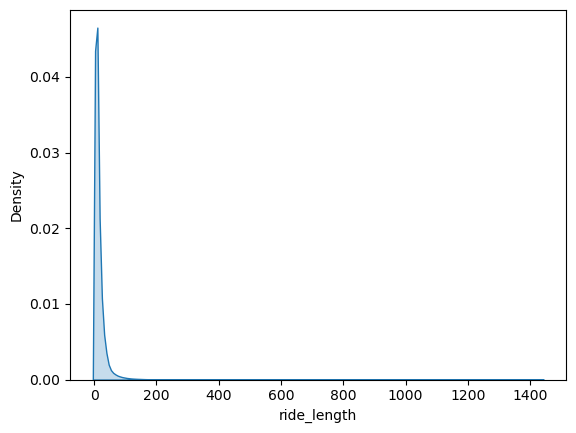

In [23]:
sns.kdeplot(df[df['ride_length'] < 1440].ride_length, fill = True);

We can observe that our data is very right skewed. This implies that most ride lengths have a short period of time. However we have a high sample size, and we are going to omit this for this analize.  Lets get some insights about our data.

For the next analyze we are going to drop the 

### Rides by Customer Type

First let's which percentage of users are members and casual. As we can see in the pie chart, annual members represent the majority of Cyclistic's bike-sharing system users, making up for 60% of total users.

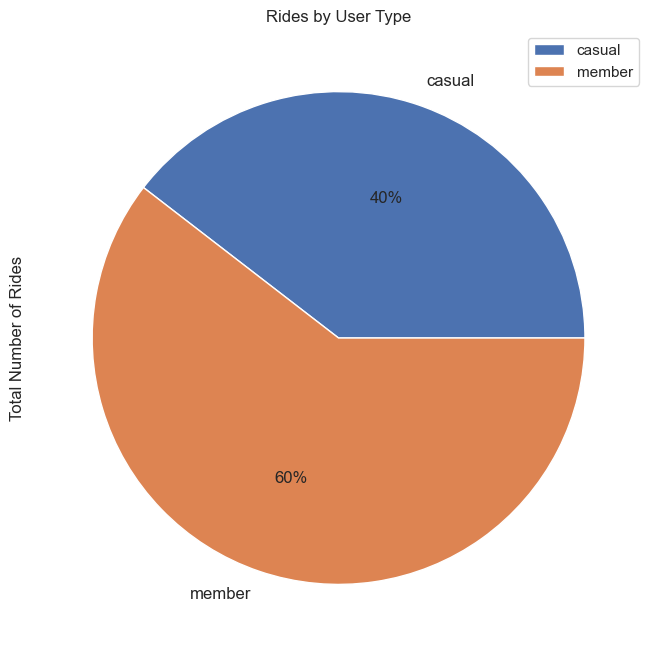

In [37]:
MemberCasual=df.groupby('member_casual').agg({'ride_id':np.count_nonzero})

#Plot
MemberCasual['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, figsize=(10, 8));

### Average Ride Length

The column chart below shows us that casual riders have a much greater ride length average than members. The average ride length is **23 minutes for casual riders** and **12 minutes for members**.

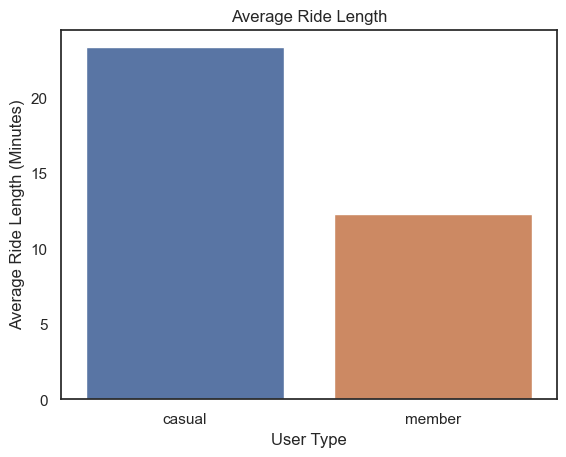

In [36]:
arl = df.groupby('member_casual').agg({'ride_length':np.mean})

#Plot
sns.set_theme(style='white')
sns.barplot(data=arl, x=arl.index, y='ride_length').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)');

### Most Popular Rideable Type

According to our dataset, Cyclistic's bikes are divided into three groups: classic bike, docked bike, and electric bike. It is clear in the visualization that classic bike is the most rented rideable type by both casual riders and members. This could either be explained by the users showing a preference for the classic type or, more plausibly, the company has invested more heavily in a classic-based system rather than the other two options.

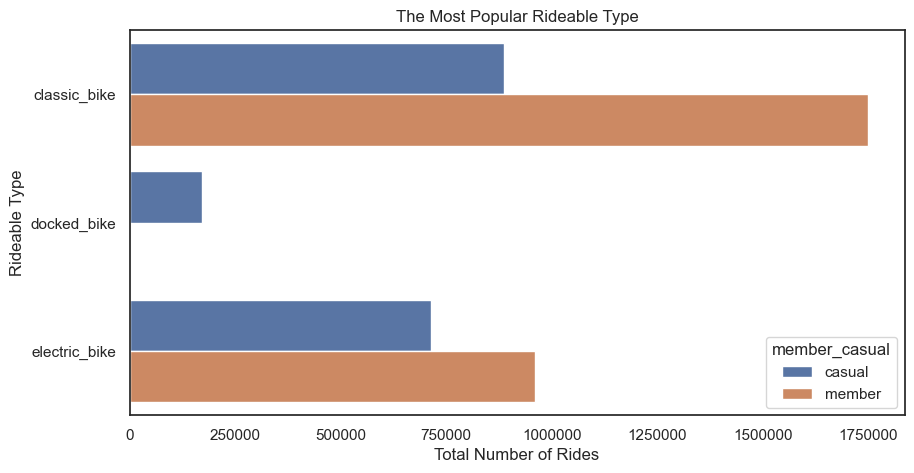

In [35]:
rt = df.groupby(['rideable_type', 'member_casual'], as_index=False).agg({'ride_id':np.count_nonzero})

#Plot
plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', data=rt).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type');

### Most Popular Day of the Week for Bike Rentals

When it comes to bike rentals by day of the week, there are similarities and differences between casual riders and members. For instance, Saturday is the most popular day for both user types, and on Sunday their number of rides is very much the same. On the other hand, the two groups differ considerably when it comes to bike rentals throughout the weekdays: members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.

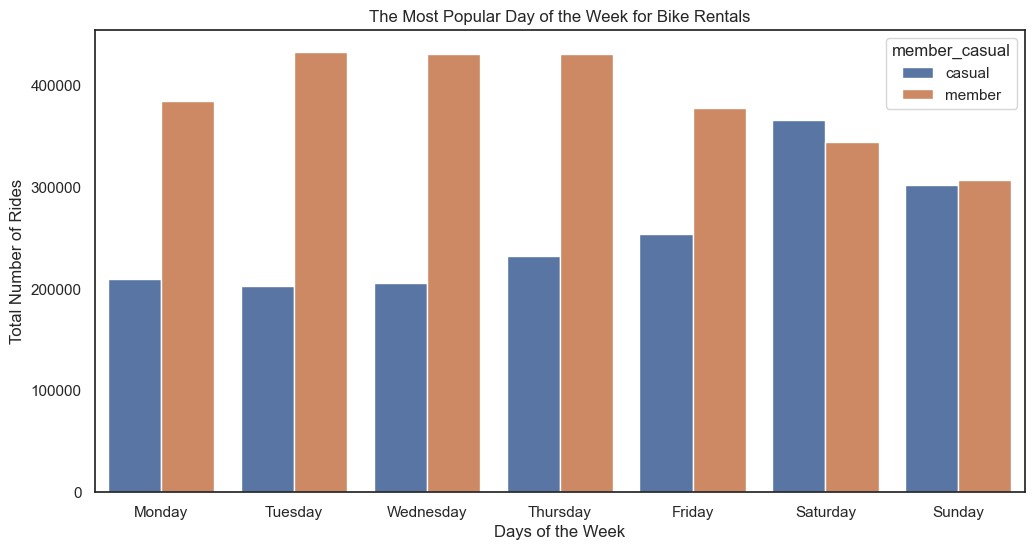

In [34]:
pdw = df.groupby(['dayofweek', 'member_casual'], as_index=False).agg({'ride_id':np.count_nonzero})

#Plot
plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(pdw, x='dayofweek', y='ride_id', hue='member_casual',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides');

###  Most Popular Month of the Year for Bike Rentals

Visualizing the number of rides per month can help us learn if seasonality plays a role in bike rental. The chart above shows us that the number of rentals increases during the summer months and gradually drops over the fall and winter for both user types. The main difference is that members are still more consistent with their rental habits throughout the year when compared to casual riders, whose numbers drop significantly during the winter months.

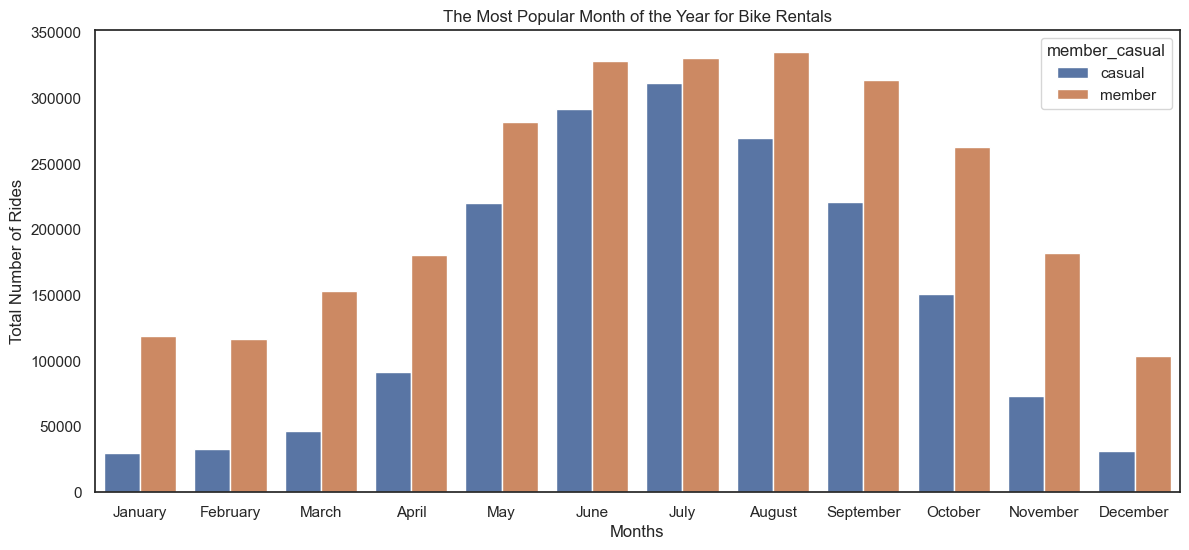

In [33]:
pmy = df.groupby(['month', 'member_casual'], as_index=False).agg({'ride_id':np.count_nonzero})

#Plot
plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(pmy, x='month', y='ride_id', hue='member_casual', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

### Total Number of Rides per Hour

By taking a closer look into the total number of rides per hour, we can find more patterns in the customers' bike rental habits. The number of bike rentals by casual riders begins to increase between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm. Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.

<Figure size 1400x600 with 0 Axes>

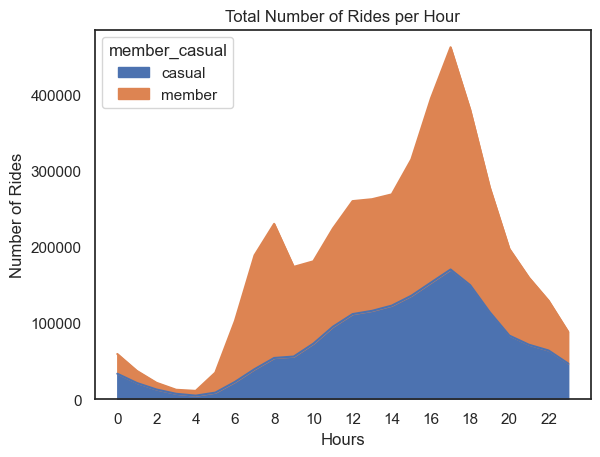

In [32]:
nrph = df.groupby(['hour', 'member_casual'], as_index=False).agg({'ride_id':np.count_nonzero})
nrph = nrph.pivot(index='hour', columns='member_casual', values='ride_id')

#Plot
plt.figure(figsize = (14,6))
sns.set_theme(style='white')
nrph.plot(kind='area', stacked=True)

x_ticks = np.arange(min(nrph.index), max(nrph.index) + 1, 2)  # Set desired x-axis tick locations
plt.xticks(x_ticks)

plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.title('Total Number of Rides per Hour');

In [ ]:
#geolocationmap